In [2]:
import re

In [22]:
p = re.compile('^grid[.](\d+)[.](\w{2})')
m = p.match("grid.6582.90000 0004 1936 9748Department of Gene Therapy, Ulm University, 89081")
print(m)

<re.Match object; span=(0, 12), match='grid.6582.90'>


In [23]:
pattern = "grid.419495.40000 0001 1014 8330"
m = p.match(pattern)
print(m)

<re.Match object; span=(0, 14), match='grid.419495.40'>


In [24]:
pattern = "grid.33199.310000"
m = p.match(pattern)
print(m)

<re.Match object; span=(0, 13), match='grid.33199.31'>


In [26]:
pattern  = "grid.418615.f0000"
m = p.match(pattern)
print(m)

<re.Match object; span=(0, 14), match='grid.418615.f0'>


# 1. 인스타그램 크롤링
## 인스타 그램 접속 후 로그인하기
* 크롬드라이버로 크롬 브라우저를 띄운 후에 이 브라우저에서 url호출해 로그인화면 띄워놓고 시작

In [18]:
from selenium import webdriver
driver = webdriver.Chrome("../DataScience/driver/chromedriver.exe")

In [16]:
import time
driver.get("https://www.instargram.com")
time.sleep(2)

In [19]:
email = "seosangseo@gmail.com"
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)


password = "!119Service!"
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

## 인스타그램 검색결과 URL만들어서 접속하기

In [21]:
# https://www.instagram.com/explore/tags/{키워드}/
# {키워드} : 제주도맛집, 독도, 강원도여행
def insta_searching(word):
    url ="https://www.instagram.com/explore/tags/"+word
    return url

In [22]:
word = '제주도맛집'
url  = insta_searching(word)
driver.get(url)

## 첫번째 게시글 열기

In [23]:
def select_firstpage(driver):
    first = driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(3)
    
select_firstpage(driver)    

In [24]:
import re
from bs4 import BeautifulSoup
import unicodedata  # 한글 데이터깨지는것 방지


# 본문내용, 작성일시, 위치 정보
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, "lxml") # 파서 지정
    
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content)
    except:
        content = ' '
    # 본문 내용에서 해시태그 가져오기(정규식 활용)
    # `#`뒤에 연속된 문자(공백, #, W)가 아닌 경우 
    # 리스트타입으로 tags변수에 저장
    tags = re.findall(r'#[^\s#,\\]+', content)  
    #년월 정보만 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    
    # 좋아요 수 가져오기
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
    
    # 위치정보 가져오기
    try: 
        place = soup.select('div.M30cS')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
    # 수집한 정보 저장하기
    data = [content, date, like, place, tags]
    return data

#get_content(driver)

In [25]:
def move_next(driver):
    # class=" _65Bje  coreSpriteRightPaginationArrow"
    right = driver.find_element_by_css_selector("a._65Bje.coreSpriteRightPaginationArrow")
    right.click()
    time.sleep(3)

## 여러 게시글 정보 수집하기

In [26]:
# 인스타 그램 검색 페이지 URL만들기
from tqdm import tqdm_notebook
word = '제주도맛집'
url = insta_searching(word)

driver.get(url)
time.sleep(3)

# 첫번째 게시글 수집
select_firstpage(driver)

# 저장하기 위한 변수
results = []

# 여러 게시물 수집
target = 500
for i in tqdm_notebook(range(target)):
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
print(results)

NameError: name 'result' is not defined

In [31]:
results[:10]

[['산도롱맨도롱----------🍜제주 유일무이 고기국수 맛집🍜불향가득한 갈비한덩어리가 풍덩~!쫄깃한 면발과 100% 사골육수베이스가 끝내주는 갈비국수맛집👍오늘은 산도롱맨도롱에서✔..산도롱맨도롱동절기영업시간:08:00~20:00(last 19:00)(매주화요일은 휴무입니다)문의 : 064-782-5105.#제주도맛집#제주맛집#제주도고기국수#성산일출봉맛집#광치기해변맛집#제주먹방#제주서귀포맛집#성산아침식사#성산일출봉아침식사',
  '2021-02-17',
  0,
  '',
  ['#제주도맛집',
   '#제주맛집',
   '#제주도고기국수',
   '#성산일출봉맛집',
   '#광치기해변맛집',
   '#제주먹방',
   '#제주서귀포맛집',
   '#성산아침식사',
   '#성산일출봉아침식사']],
 ['정말 맛있었던 동래시장 신가네 떡볶이.⠀사실 떡볶이는 살도 많이 찌는 음식이고 건강에 좋지 않다는 걸 알면서도 맛있으니까 그걸 감수하고 한 번씩 먹는 건데 맛이 없으면 안 되잖아요.⠀떡볶이는 정말 무조건 맛있어야 합니다!⠀*⠀저는 일전에도 밝힌 적이 있지만 어릴 적에는 떡볶이를 좋아하지 않았는데 전 여친을 만나 떡볶이에 눈을 뜨게 되었죠.⠀여기 떡 좀 씹어보신 분들 많으시죠?⠀저는 아직 떡볶이 내공이 십 년도 안 되지만 신가네의 떡볶이가 특별하게 맛있는 떡볶이라는 건 압니다.⠀떡볶이야 어딜 가도 어지간하면 다 맛있지만특별하게 맛있는 집들은 흔하지가 않죠.⠀그냥 순수하게 떡볶이 맛만으로는 이 집 정말 제 취향이었어요.⠀*⠀여러분 부산에서 떡볶이 드셔보셨어요?⠀부산에서는 국물이 흥건한 서울의 떡볶이와 조금 다르게 끈적하고 매운 양념을 떡에 묻힌 것처럼 떡볶이를 내는 곳들이 많아요.⠀신가네 떡볶이 역시 부산식 맵고 끈적끈적한 떡볶이 양념을 쓰는데 이 집의 킬링 포인트는 그 양념과 함께 무말랭이가 들어가 있다는 겁니다.⠀맵고 달짝지근한 양념에 푹 잠긴 말랑한 떡을 먹는 중간 중간 씹히는 무말랭이의 아삭한 식감이 참 재밌더군요. 이쯤 되면 다들 오늘 저녁은 떡볶이??

In [47]:
import pandas as pd
# type(results)
df = pd.DataFrame(results, columns = ['맛집설명', '등록일', '추천갯수', '장소','해쉬태그'])
df.tail(20)

,맛집설명,등록일,추천갯수,장소,해쉬태그
479,제주밀보리김치 배송 잘도착했다고 사진 보내주셨습니다😍👍맛있게 드세용❤@__jenni...,2021-02-18,0,제주 민속촌,"[#당뇨김치, #샐러드김치, #얼갈이보리김치, #미친김치, #비건김치, #위대한밥상..."
480,하와이안비치카페#섭지코지카페#서귀포카페#제주도카페#성산일출봉카페#제주카페##휘닉스아...,2021-02-18,0,하와이안비치카페,"[#섭지코지카페, #서귀포카페, #제주도카페, #성산일출봉카페, #제주카페, #휘닉..."
481,미미여사랑 급 제주 너무 좋다❤️,2021-02-18,0,환상의 섬 Jeju Island,[]
482,"에휴, 내 귤은 언제주는 구야(한탄)귤국에서 귤에 둘러 쌓였는데 생각보다 많이 못먹...",2021-02-18,0,제주도,[]
483,#첫줄안녕.#분홍소녀토퍼.비행기 타고 슝✈.✔이름 및 색상 변경 가능합니다✔토퍼 문...,2021-02-18,0,,"[#첫줄안녕., #분홍소녀토퍼.비행기, #케이크토퍼, #토퍼주문제작, #토퍼, #토..."
484,"그 계절, 우리가 기억하는 제주📃.커피, 디저트, 음악, 책, 감성소품제주의 감성이...",2021-02-18,0,꽃향유,"[#꽃향유, #애월카페, #애월카페꽃향유, #제주도소품샵, #애월소품샵, #제주도소..."
485,커피&브런치 제주여행만족😍💖오션뷰 카페☕#커플카페#제주여행#감성카페#제주브런치맛집#...,2021-02-18,0,제주귀더크,"[#커플카페, #제주여행, #감성카페, #제주브런치맛집, #한림핫플, #애월핫플, ..."
486,커피&브런치 제주여행만족😍💖오션뷰 카페☕#커플카페#제주여행#감성카페#제주브런치맛집#...,2021-02-18,0,제주시 한림읍 협재리,"[#커플카페, #제주여행, #감성카페, #제주브런치맛집, #한림핫플, #애월핫플, ..."
487,애월오션뷰 제주맛집 제주유일 토핑시그니처카레 맛집😍1층 모든공간이 주차장 넓어 주차...,2021-02-18,0,제주도 애월읍,"[#사이카레, #애월맛집, #제주맛집인정, #제주핫플, #애월, #제주도, #애월핫..."
488,제주에서브런치&디저트💖 커피맛집👍오션뷰+브런치맛집추천해요🤗#제주도맛집#제주도여행#애...,2021-02-18,0,애월해안가,"[#제주도맛집, #제주도여행, #애월커피, #제주브런치맛집, #한림핫플, #애월핫플..."


In [49]:
df = df.drop_duplicates(subset='장소')

In [50]:
df.to_excel("../999.Data Analysis Project/data/Jejudo_deliciousFood.xlsx", encoding = 'utf-8')

### 저장한 엑셀파일 읽어보기 

In [35]:
yummi = pd.read_excel("../999.Data Analysis Project/data/Jejudo_deliciousFood.xlsx", index_col = 0)
yummi.head()

,맛집설명,등록일,추천갯수,장소,해쉬태그
0,산도롱맨도롱----------🍜제주 유일무이 고기국수 맛집🍜불향가득한 갈비한덩어리가...,2021-02-17,0.0,NaN,"['#제주도맛집', '#제주맛집', '#제주도고기국수', '#성산일출봉맛집', '#..."
1,정말 맛있었던 동래시장 신가네 떡볶이.⠀사실 떡볶이는 살도 많이 찌는 음식이고 건강...,2021-02-17,0.0,"Busan, South Korea",[]
2,제주도 오면 함 먹어줘야지~#올래국수 기다렸다가 먹을 보람이 있네,2021-02-17,0.0,환상의 섬 Jeju Island,['#올래국수']
3,저희 내일 쉬어요^^내일 많이 춥대요🌬옷 따스하게 입으셔욥😁𖤐 애월본점(수요일휴무)...,2021-02-16,0.0,NaN,"['#제주도맛집', '#애월맛집', '#제주맛집', '#애월해안도로맛집', '#제주..."
4,애월 #수산봉청량뷰보며 그네다면 쌉힐링 가능~B코스로 올라가다 보면 그네가 있어!눈...,2021-02-16,0.0,NaN,"['#수산봉청량뷰보며', '#선팔하면맞팔', '#선팔하면맞팔가요', '#맞팔100'..."


In [38]:
yummi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   맛집설명    499 non-null    object        
 1   등록일     499 non-null    datetime64[ns]
 2   추천갯수    428 non-null    float64       
 3   장소      295 non-null    object        
 4   해쉬태그    499 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 23.4+ KB


In [40]:
yummi['등록일'] = pd.to_datetime(yummi['등록일'], format = "%Y-%m-%d")

# yummi['추천갯수'] = yummi['추천갯수'].str.replace(',', '')

In [42]:
yummi['추천갯수'] = pd.to_numeric(yummi['추천갯수'])

In [43]:
yummi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   맛집설명    499 non-null    object        
 1   등록일     499 non-null    datetime64[ns]
 2   추천갯수    428 non-null    float64       
 3   장소      295 non-null    object        
 4   해쉬태그    499 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 23.4+ KB


In [44]:
yummi.sort_values(by = '추천갯수', ascending = False)

,맛집설명,등록일,추천갯수,장소,해쉬태그
0,산도롱맨도롱----------🍜제주 유일무이 고기국수 맛집🍜불향가득한 갈비한덩어리가...,2021-02-17,0.0,NaN,"['#제주도맛집', '#제주맛집', '#제주도고기국수', '#성산일출봉맛집', '#..."
353,천지연 폭포 🤍,2021-02-16,0.0,제주도,[]
350,예쁜 사진 감사합니다❤️.이탈리아 감성 카페 하도미술관.#제주도신상카페 .010-8...,2021-02-18,0.0,하도미술관,"['#제주도신상카페', '#제주', '#제주도', '#제주도여행', '#제주여행',..."
349,예쁜 사진 감사합니다❤️.이탈리아 감성 카페 하도미술관.#제주도신상카페 .010-8...,2021-02-18,0.0,하도미술관,"['#제주도신상카페', '#제주', '#제주도', '#제주도여행', '#제주여행',..."
348,예쁜 사진 감사합니다❤️.이탈리아 감성 카페 하도미술관.#제주도신상카페 .010-8...,2021-02-18,0.0,하도미술관,"['#제주도신상카페', '#제주', '#제주도', '#제주도여행', '#제주여행',..."
...,...,...,...,...,...
424,제주브런치맛집 오션뷰신상카페 귀더크제주유일 흑돼지카츠산도 와 전국유일 시그니처수제와...,2021-02-18,NaN,제주귀더크,"['#제주도맛집', '#제주도여행', '#애월커피', '#제주브런치맛집', '#한림..."
427,애월브런치커피 오션뷰맛집 귀더크제주유일 흑돼지카츠산도 와 전국유일 시그니처수제와플 ...,2021-02-18,NaN,제주귀더크,"['#제주커피맛집', '#제주여행', '#애월커피', '#제주브런치맛집', '#한림..."
428,.애월 로드129성게크림파스타흑돼지함박스테이크흑돼지치즈돈까스훅돼지수제돈까스해물야끼소...,2021-02-18,NaN,NaN,"['#애월맛집', '#제주맛집', '#애월읍맛집', '#애월항맛집', '#제주애월점..."
470,공항에서 가까운곳으로 찾아간 #제주분식좋은선택이었다 ㅋㅋ제주분식전화 - 064-72...,2021-02-18,NaN,NaN,"['#제주분식좋은선택이었다', '#제주현지인맛집', '#제주맛집', '#제주도맛집'..."


### 여러개의 엑셀파일을 읽어 통합하고 저장하기

In [117]:
#  여러 개의 저장파일 통합하기
jeju_insta_df = pd.DataFrame( [ ] )

f_list = ['../data/1_crawling_jejudoMatJip.xlsx', '../data/1_crawling_jejudoGwanGwang.xlsx', 
          '../data/1_crawling_jejuMatJip.xlsx', '../data/1_crawling_jejuYeoHang.xlsx']
for fname in f_list:
    fpath = fname
    print(fpath)
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)

jeju_insta_df.columns =['content','data','like','place','tags']

../data/1_crawling_jejudoMatJip.xlsx
../data/1_crawling_jejudoGwanGwang.xlsx
../data/1_crawling_jejuMatJip.xlsx
../data/1_crawling_jejuYeoHang.xlsx


In [ ]:
jeju_insta_df

In [118]:
# 5-13 중복 데이터 제거하고 저장하기
jeju_insta_df.drop_duplicates(subset = [ "content"] , inplace = True)
print(jeju_insta_df)
jeju_insta_df.to_excel('../data/1_crawling_raw.xlsx', index = False)

                                                content        data like  \
0     제주도 도착~~공항근처 #제주분식 에서 먹은 첫식사만족만족!#제주맛집#제주도맛집#제...  2019-01-01  705   
1     ﻿#함덕맛집 무거버거 바다 보면서 먹으니까 더 꿀맛👍🏻 #제주도카페투어#제주일상#함...  2019-01-01  384   
2     .대만족 제주스!.#동문시장#제주동문시장#제주도기념품#제주기념품#제주스는완벽#제주도...  2019-01-01  595   
3     #제주여행#2일차무거버거 제주와서 먹은것중에 제일 맛있었음!#제주도여행#제주맛집#함...  2019-01-01  412   
4     🥇1월 영업 안내🥇-1월 2일, 3일(수,목)은 쉬어갑니다-1월 4일,5일,6일(금...  2019-01-01  364   
...                                                 ...         ...  ...   
1702  Now it's purple😆💜수색 넘 이쀼리 🤭 올해는 아퓨지말구 즐거운 일만 가...  2019-01-01   42   
1703  .간다간다간다#제주 #친정여행 #겨울방학 #제주여행앞머리는 괜히 전날 잘라서 또순이...  2019-01-01   50   
1705  2019년 모두 복 많이많이 받고 풍요로운 한해 보내길 ♥️#사진좀찍으시는님덕에건져...  2019-01-01   68   
1706  2018.12.25 ⠀룸에 의자가 두개 밖에 없어서 ⠀이현이는 유모차에 앉아서 식사...  2019-01-01   70   
1707  .2019년 첫날디스이즈핫에서 새해를 맞이하시는 손님들께 떡국을 준비했습니다.한 해...  2019-01-01   48   

       place                                               tags  
0        NaN  ['#제주분식

### 제주도 맛집데이터를 이용해 워드 클라우드 해보기 

In [121]:
import pandas as pd

content    2845
data       2845
like       2845
place      2845
tags       2845
dtype: int64

In [123]:
raw_total = pd.read_excel("../data/1_crawling_raw.xlsx")
raw_total['tags'][:3]

0    ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
1    ['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo...
2    ['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주...
Name: tags, dtype: object

In [124]:
tags_total = []
for tag in raw_total['tags']:
    tags_list = tag[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)
tags_total        

['#제주분식',
 '#제주맛집',
 '#제주도맛집',
 '#제주맛집추천',
 '#제주도맛집추천',
 '#제주도',
 '#제주맛집',
 '#용두암',
 '#신제주맛집',
 '#연동맛집',
 '#제주연동맛집',
 '#애월맛집',
 '#연동제주분식',
 '#제주공항근처맛집',
 '#제주공항맛집',
 '#돔베김밥',
 '#전복김밥',
 '#제주돈까스',
 '#jeju',
 '#제주도가볼만한곳',
 '#함덕맛집',
 '#제주도카페투어',
 '#제주일상',
 '#함덕',
 '#jejudo',
 '#jeju',
 '#제주도맛집',
 '#함덕맛집무거버거짱',
 '#일상',
 '#제주살이',
 '#제주도살이',
 '#함덕해수욕장',
 '#함덕카페',
 '#함덕맛집',
 '#제주카페',
 '#제주도카페',
 '#제주도맛집추천',
 '#제주도민',
 '#제주도민맛집',
 '#제주도맛집',
 '#제주맛집',
 '#제주도여행',
 '#동문시장',
 '#제주동문시장',
 '#제주도기념품',
 '#제주기념품',
 '#제주스는완벽',
 '#제주도맛집',
 '#제주맛집',
 '#제주도주스',
 '#제주도한라봉주스',
 '#제주도카페',
 '#제주카페',
 '#제주도기념품',
 '#제주기념품',
 '#제주감성소품',
 '#제주도여행',
 '#제주여행',
 '#2일차무거버거',
 '#제주도여행',
 '#제주맛집',
 '#함덕맛집',
 '#제주도버거',
 '#함덕해변',
 '#제주도맛집추천',
 '#제주도가볼만한곳',
 '#여행스타그램',
 '#제주도수제버거',
 '#제주여행',
 '#제주도카페',
 '#제주도맛집',
 '#조천읍',
 '#함덕맛집무거버거짱',
 '#조천카페',
 '#함덕해수욕장',
 '',
 '#제주마카롱',
 '#월정리카페콧수염',
 '#월정리맛집',
 '#월정리카페',
 '#월정리',
 '#구좌읍맛집',
 '#제주맛집',
 '#제주도맛집',
 '#함덕해수욕장',
 '#제주도민맛집',
 '#함덕맛집',
 '#성산맛집',
 '#구좌맛집',
 '#애월맛집',
 '#서귀포맛집',

In [125]:
from collections import Counter
tag_counts = Counter(tags_total)

In [127]:
tags_common = tag_counts.most_common(50)
tags_common

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#jeju', 749),
 ('#일상', 701),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#선팔', 503),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주눈썹문신', 434),
 ('#서귀포눈썹문신', 420),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#반영구', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주속눈썹', 397)]

### 데이터 정제

In [129]:
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹', '#서귀포눈썹문신', '#소통', '#맞팔']
tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주눈썹문신', 434),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주속눈썹', 397),
 ('#먹스타그램', 395),
 ('#서귀포반영구', 395),
 ('#서귀포속눈썹', 395),
 ('#제주남자눈썹문신', 395),
 ('#서귀포자연눈썹', 395),
 ('#서귀포남자눈썹문신', 395)]

In [138]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 설치 
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False

In [132]:
tags_count_df = pd.DataFrame(tag_counts_selected.most_common(30))
tags_count_df.columns = ['tags', 'counts']

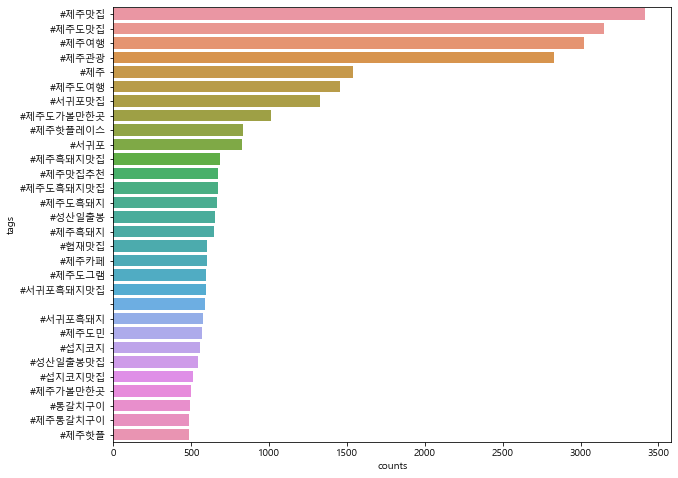

In [134]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'counts', y = 'tags', data = tags_count_df)

In [136]:
from wordcloud import WordCloud

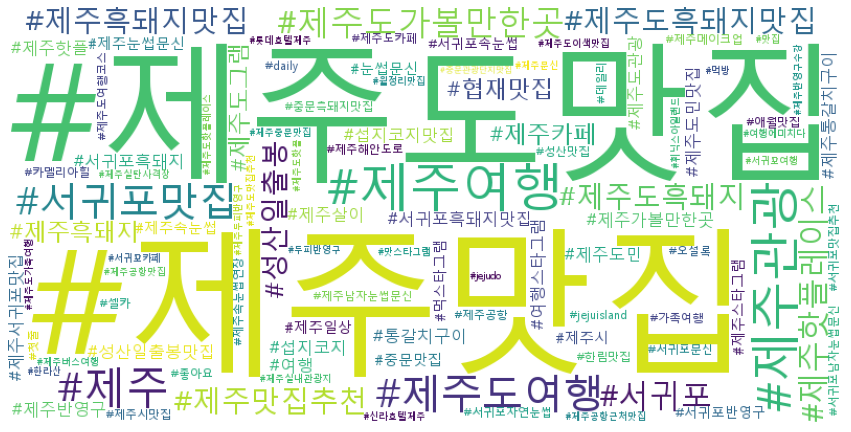

In [140]:
wordcloud = WordCloud(font_path = font_path,
                      background_color = 'white',
                      max_words = 100,
                      relative_scaling = 0.3,
                      width = 800,
                      height = 400).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("../data/2_tag-wordcloud.png")

### 제주도 맛집 위치 정보

#### 데이터 준비
* 장소명이 있는 곳으로 준비 
* 구글맵을 이용해 위치 정보 가져오기 

In [151]:
yummiJeju = raw_total[raw_total['place'].notna()]
yummiJeju.head(2)

,content,data,like,place,tags
4,"🥇1월 영업 안내🥇-1월 2일, 3일(수,목)은 쉬어갑니다-1월 4일,5일,6일(금...",2019-01-01,364,로타리과자점,[]
5,✔️리얼딸기우유🍓.제주유기농 딸기를 가득가득 넣어서만들어 드립니다^^.하루 100병...,2019-01-01,757,월정리카페콧수염,"['#제주마카롱', '#월정리카페콧수염', '#월정리맛집', '#월정리카페', '#..."


In [152]:
yummiJeju.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2845 entries, 4 to 8368
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  2845 non-null   object
 1   data     2845 non-null   object
 2   like     2845 non-null   object
 3   place    2845 non-null   object
 4   tags     2845 non-null   object
dtypes: object(5)
memory usage: 133.4+ KB


### 컬럼명 정리

In [153]:
yummiJeju.columns = ['맛집내용', '등록일', '추천갯수', '상호명', '해쉬태그']ㅊ

### 데이터 정제 및 타입 변경

In [155]:
yummiJeju['추천갯수'] = yummiJeju['추천갯수'].str.replace(',', '')
yummiJeju['추천갯수'] = pd.to_numeric(yummiJeju['추천갯수'])

In [157]:
yummiJeju['등록일'] = pd.to_datetime(yummiJeju['등록일'], format = "%Y-%m-%d")

In [159]:
yummiJeju.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2845 entries, 4 to 8368
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   맛집내용    2845 non-null   object        
 1   등록일     2845 non-null   datetime64[ns]
 2   추천갯수    2841 non-null   float64       
 3   상호명     2845 non-null   object        
 4   해쉬태그    2845 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 133.4+ KB


In [161]:
yummiJeju.head(2)

,맛집내용,등록일,추천갯수,상호명,해쉬태그
4,"🥇1월 영업 안내🥇-1월 2일, 3일(수,목)은 쉬어갑니다-1월 4일,5일,6일(금...",2019-01-01,364.0,로타리과자점,[]
5,✔️리얼딸기우유🍓.제주유기농 딸기를 가득가득 넣어서만들어 드립니다^^.하루 100병...,2019-01-01,757.0,월정리카페콧수염,"['#제주마카롱', '#월정리카페콧수염', '#월정리맛집', '#월정리카페', '#..."


In [168]:
yummiJeju.sort_values(by = '추천갯수', ascending = False)[['상호명', '추천갯수','맛집내용']]

,맛집내용,등록일,추천갯수,상호명,해쉬태그
34,"-제주도 하늘아래에서는!(홀수날:오름투어, 짝수날:바다투어)#일출투어#제주도일출사진...",2019-01-01,230.0,하늘아래 게스트하우스,"['#일출투어', '#제주도일출사진관', '#제주도여행', '#여행에미치다', '#..."
38,.매운거 좋아하시는 분들은단계별로 골라먹을수 있고 맛나고 분위기 좋은 곳.#맵찜#...,2019-01-01,208.0,Jeju,"['#맵찜', '#제주맛집', '#제주맛집맵찜', '#거문오름맛집', '#조천읍맛집..."
50,황금돼지해 🐷🐽다들 새해복! 많이 받으세요😊:#happynewyear #2019 #...,2019-01-01,19.0,쿠주,"['#happynewyear', '#2019', '#새해맞이', '#bye2018']"
51,제주도 여행 절반은 먹방하러 다닌듯 하다 하지만 난 후회하지 않는다. 후회는 내뱃살...,2019-01-01,184.0,Jeju,"['#다이어트', '#안녕', '#먹는게', '#제일좋아', '#친구들모여라', '..."
53,🏠 Can U Join Us?2019년 새해에도 쿠주에서 함께해요.손님을 항상 나의...,2019-01-01,12.0,쿠주,"['#happynewyear', '#2019', '#새해맞이', '#bye2018']"
...,...,...,...,...,...
8358,.Bye Bye 2018 👋Welcome 2019 🙏#하얏트리젠시제주2019년 1...,2019-01-01,63.0,하얏트 리젠시 제주ㅣHyatt Regency Jeju,"['#하얏트리젠시제주2019년', '#제주살이', '#각수부부', '#제주생활', ..."
8360,181231 탱자탱자~~나 사실 어제 서울왔는데 사진이 넘 많네~~한살 더 먹어서 ...,2019-01-01,103.0,Jeju-do,"['#제주도', '#제주', '#제주도여행', '#제주여행', '#jejuislan..."
8361,역시 돌아다니는건 아니야🤪..#제주도 #제주여행 #카멜리아힐,2019-01-01,71.0,카멜리아 힐,"['#제주도', '#제주여행', '#카멜리아힐']"
8362,추워지니 여름도 그립다#제주 #제주도 #제주여행 #노을 #금능 #여름제주 #monjeju,2019-01-01,11.0,금능해변,"['#제주', '#제주도', '#제주여행', '#노을', '#금능', '#여름제주'..."


In [170]:
yummiJeju.loc[yummiJeju['상호명'] == '하늘아래 게스트하우스']

,맛집내용,등록일,추천갯수,상호명,해쉬태그
33,"-제주도 하늘아래에서는!(홀수날:오름투어, 짝수날:바다투어)#일출투어#일출사진관#여...",2019-01-01,124.0,하늘아래 게스트하우스,"['#일출투어', '#일출사진관', '#여행에미치다', '#jejuisland', ..."
34,"-제주도 하늘아래에서는!(홀수날:오름투어, 짝수날:바다투어)#일출투어#제주도일출사진...",2019-01-01,230.0,하늘아래 게스트하우스,"['#일출투어', '#제주도일출사진관', '#제주도여행', '#여행에미치다', '#..."
943,"-제주도 하늘아래에서는!(홀수날:오름투어, 짝수날:바다투어)#일출투어#일출사진관#제...",2019-01-01,318.0,하늘아래 게스트하우스,"['#일출투어', '#일출사진관', '#제주도여행', '#jeju', '#제주여행'..."
8025,"-제주도 하늘아래에서는!(홀수날:오름투어, 짝수날:바다투어)#일출투어#일출사진관#제...",2019-01-01,144.0,하늘아래 게스트하우스,"['#일출투어', '#일출사진관', '#제주도여행', '#여행에미치다', '#여행이..."


#### 중복된 상호명 제거 

In [185]:
yummiJeju = yummiJeju.drop_duplicates(subset='상호명')

#### 상호명으로 제주맛집의 위경도 정보 

In [188]:
import googlemaps
import numpy as np
gmap_key = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
gmaps = googlemaps.Client(key=gmap_key)

from tqdm import tqdm_notebook

lat = []
lng = []
address = []

for n in tqdm_notebook(yummiJeju.index):
    try:
        tmp_add = yummiJeju['상호명'][n]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        address.append(tmp_map[0].get("formatted_address"))
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        address.append(np.nan)
        print("Here is nan !")
        
yummiJeju['lat'] = lat
yummiJeju['lng'] = lng
yummiJeju['address'] = address
yummiJeju

Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !



,맛집내용,등록일,추천갯수,상호명,해쉬태그,lat,lng,address
4,"🥇1월 영업 안내🥇-1월 2일, 3일(수,목)은 쉬어갑니다-1월 4일,5일,6일(금...",2019-01-01,364.0,로타리과자점,[],33.251599,126.562807,"1층, 16 Dongmun-ro, Seogwi-dong, Seogwipo, Jeju..."
5,✔️리얼딸기우유🍓.제주유기농 딸기를 가득가득 넣어서만들어 드립니다^^.하루 100병...,2019-01-01,757.0,월정리카페콧수염,"['#제주마카롱', '#월정리카페콧수염', '#월정리맛집', '#월정리카페', '#...",33.559382,126.793178,"South Korea, Jeju-do, Cheju, 특별자치도, Gujwa-eup,..."
15,Incluso cuando sé que saldré lastimado...For m...,2019-01-01,8.0,서울맛집,"['#btskimseokjin', '#weloveyouseokjin', '#btss...",37.538247,127.053934,"6-9 Seongdeokjeong 15(sibo)-gil, Seongsu-dong ..."
17,더위 먹어서 죽을뻔 하다가 흑돼지 먹고 다시 살아남 #흑돼지#보양식#육팔청춘#♥#여...,2019-01-01,171.0,Jeju,"['#흑돼지', '#보양식', '#육팔청춘', '#♥', '#여행사진', '#제주여...",33.489011,126.498302,"Jeju-do, South Korea"
25,#맛스타그램.#매운돼지갈비찜#쫀득만두#돈까스정식.제주에서 처음 먹어본 줄서서 먹는 ...,2019-01-01,21.0,제주여행 가야밀면,"['#맛스타그램.', '#매운돼지갈비찜', '#쫀득만두', '#돈까스정식.제주에서'...",33.487971,126.484974,"South Korea, Cheju, Nohyeong-dong, 907-3 노형동 제..."
...,...,...,...,...,...,...,...,...
8335,오늘은 벽면 장식품들이 우르르 나갔어요☺.마감이 30분 정도 남았네요!.내일 사락은...,2019-01-01,42.0,사락,"['#제주소품샵', '#제주도소품샵', '#서귀포소품샵', '#제주도옷가게', '#...",45.639501,-89.405019,"Sarocka Field, 325 E Rives St, Rhinelander, WI..."
8338,#2019년첫날모던하우스 나들이🙃자기만큼 큰 장바구니를 요리조리.😝트램폴린 백 번타...,2019-01-01,68.0,모던하우스 제주점,"['#2019년첫날모던하우스', '#제주6일차', '#2019년첫날인데', '#날씨...",33.519655,126.570351,"South Korea, Jeju-do, Cheju, Hwabuk-dong, Ilju..."
8343,❤️새해복 많이 받으세요❤️오늘도 하도섬은 정상영업 합니다:))#카페하도섬 #제주M...,2019-01-01,37.0,카페하도섬/엠스테이펜션,"['#카페하도섬', '#제주M스테이....➰카페', '#jeju', '#제주카페',...",33.525291,126.863458,"3199 Hado-ri, Gujwa-eup, Cheju, Jeju-do, South..."
8348,.안먹고 갔으면 후회할뻔~~저녁을 위해 많이 못먹는게 한이 될 듯~~ㅋ목살 엄청~~...,2019-01-01,24.0,돈사돈중문점,"['#제주여행', '#가족여행', '#돈사돈', '#돈사돈중문점', '#흑돼지전문점...",33.251020,126.433108,"South Korea, Jeju-do, Seogwipo, 특별자치도, Jungmun..."


### 제주도 맛집 지도에 표시

In [205]:
from folium.plugins import MarkerCluster
import folium

mean_lat= np.mean(yummiJeju.lat)
mean_lng= np.mean(yummiJeju.lng)
mean_lat, mean_lng

m = folium.Map(location=[33.431441 , 126.874237], zoom_start=10.5)

marker_cluster = MarkerCluster().add_to(m)
for n in yummiJeju.index:
    # pd.notnull(oil_price_top10['lat'][n])
    if pd.notnull(yummiJeju['lat'][n]):
        folium.Marker(location = [yummiJeju['lat'][n], yummiJeju['lng'][n]], 
                  popup= yummiJeju['상호명'][n], 
                  icon=folium.Icon(color='cadetblue',icon='ok') 
             ,color='lightgreen').add_to(marker_cluster)
m    

In [206]:
import seaborn as sns

,맛집내용,등록일,추천갯수,상호명,해쉬태그,lat,lng,address
4,"🥇1월 영업 안내🥇-1월 2일, 3일(수,목)은 쉬어갑니다-1월 4일,5일,6일(금...",2019-01-01,364.0,로타리과자점,[],33.251599,126.562807,"1층, 16 Dongmun-ro, Seogwi-dong, Seogwipo, Jeju..."
5,✔️리얼딸기우유🍓.제주유기농 딸기를 가득가득 넣어서만들어 드립니다^^.하루 100병...,2019-01-01,757.0,월정리카페콧수염,"['#제주마카롱', '#월정리카페콧수염', '#월정리맛집', '#월정리카페', '#...",33.559382,126.793178,"South Korea, Jeju-do, Cheju, 특별자치도, Gujwa-eup,..."
15,Incluso cuando sé que saldré lastimado...For m...,2019-01-01,8.0,서울맛집,"['#btskimseokjin', '#weloveyouseokjin', '#btss...",37.538247,127.053934,"6-9 Seongdeokjeong 15(sibo)-gil, Seongsu-dong ..."


In [211]:
yummiJeju.reset_index(drop = True, inplace = True)
yummiJeju.head()

,맛집내용,등록일,추천갯수,상호명,해쉬태그,lat,lng,address
0,"🥇1월 영업 안내🥇-1월 2일, 3일(수,목)은 쉬어갑니다-1월 4일,5일,6일(금...",2019-01-01,364.0,로타리과자점,[],33.251599,126.562807,"1층, 16 Dongmun-ro, Seogwi-dong, Seogwipo, Jeju..."
1,✔️리얼딸기우유🍓.제주유기농 딸기를 가득가득 넣어서만들어 드립니다^^.하루 100병...,2019-01-01,757.0,월정리카페콧수염,"['#제주마카롱', '#월정리카페콧수염', '#월정리맛집', '#월정리카페', '#...",33.559382,126.793178,"South Korea, Jeju-do, Cheju, 특별자치도, Gujwa-eup,..."
2,Incluso cuando sé que saldré lastimado...For m...,2019-01-01,8.0,서울맛집,"['#btskimseokjin', '#weloveyouseokjin', '#btss...",37.538247,127.053934,"6-9 Seongdeokjeong 15(sibo)-gil, Seongsu-dong ..."
3,더위 먹어서 죽을뻔 하다가 흑돼지 먹고 다시 살아남 #흑돼지#보양식#육팔청춘#♥#여...,2019-01-01,171.0,Jeju,"['#흑돼지', '#보양식', '#육팔청춘', '#♥', '#여행사진', '#제주여...",33.489011,126.498302,"Jeju-do, South Korea"
4,#맛스타그램.#매운돼지갈비찜#쫀득만두#돈까스정식.제주에서 처음 먹어본 줄서서 먹는 ...,2019-01-01,21.0,제주여행 가야밀면,"['#맛스타그램.', '#매운돼지갈비찜', '#쫀득만두', '#돈까스정식.제주에서'...",33.487971,126.484974,"South Korea, Cheju, Nohyeong-dong, 907-3 노형동 제..."


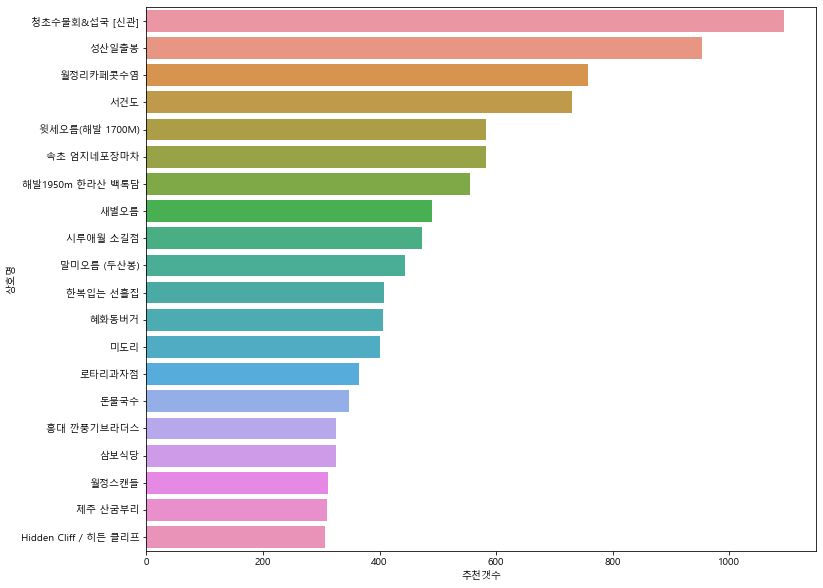

<Figure size 432x288 with 0 Axes>

In [218]:
plt.figure(figsize = (12, 10))
yummiTopLike20 = yummiJeju.sort_values(by='추천갯수', ascending = False).head(20)
sns.barplot(y = '상호명', x = '추천갯수', data = yummiTopLike20)
plt.show()
plt.tight_layout()